In [1]:
import numpy as np
import time
import multiprocessing

In [59]:
def create_ticket():
    return np.append(np.random.choice(range(1,71),6,replace=False),
                     np.random.choice(range(1,64),1))

In [60]:
def create_mytickets(numTickets):
    my_tickets = []
    
    for i in range(0, numTickets):
        my_tickets.append(create_ticket())
    return np.array(my_tickets)

In [61]:
def weekly_drawing_nopool(numTickets):
    
    master_ticket = create_ticket()
    tickets = create_mytickets(numTickets)
    
    winnings = 0
    for i in range(0, len(tickets)):
        matched = np.sum(tickets[i, 0:6] == master_ticket[0:6])
        matched_yotta = tickets[i, 6] == master_ticket[6]
        
        if matched_yotta:
            if (matched==0):
                winnings += 0.1
            elif (matched==1):
                winnings += 0.15
            elif (matched==2):
                winnings += 0.6
            elif (matched==3):
                winnings += 7.0
            elif (matched==4):
                winnings += 0.0
                #winnings += 1000.0
            elif (matched==5):
                winnings += 0.0
                #winnings += 5000.0
            elif (matched==6):
                winnings += 0.0
                #winnings += 5800000.0
        else:
            if (matched==0):
                winnings += 0.0
            elif (matched==1):
                winnings += 0.0
            elif (matched==2):
                winnings += 0.0
            elif (matched==3):
                winnings += 0.25
            elif (matched==4):
                winnings += 10.0
            elif (matched==5):
                winnings += 0.0
                #winnings += 1500.0
            elif (matched==6):
                winnings += 0.0
                #winnings += 37990.0
        
    return winnings   

In [62]:
def weekly_drawing_pool(numTickets):
    
    master_ticket = create_ticket()
    tickets = create_mytickets(numTickets)
    
    winnings = 0
    for i in range(0, len(tickets)):
        matched = np.sum(tickets[i, 0:6] == master_ticket[0:6])
        matched_yotta = tickets[i, 6] == master_ticket[6]
        
        if matched_yotta:
            if (matched==0):
                winnings += 0.1
            elif (matched==1):
                winnings += 0.15
            elif (matched==2):
                winnings += 0.6
            elif (matched==3):
                winnings += 7.0
            elif (matched==4):
                winnings += 1000.0
            elif (matched==5):
                winnings += 5000.0
            elif (matched==6):
                winnings += 5800000.0
        else:
            if (matched==0):
                winnings += 0.0
            elif (matched==1):
                winnings += 0.0
            elif (matched==2):
                winnings += 0.0
            elif (matched==3):
                winnings += 0.25
            elif (matched==4):
                winnings += 10.0
            elif (matched==5):
                winnings += 1500.0
            elif (matched==6):
                winnings += 37990.0
        
    return winnings   

In [63]:
def multiple_weekly_drawings_nopool(numWeeks, numTickets):
    winnings = 0
    for i in range(0, numWeeks):
        winnings += weekly_drawing_nopool(numTickets)
    return round(winnings,2)

In [64]:
def multiple_weekly_drawings_pool(numWeeks, numTickets):
    winnings = 0
    for i in range(0, numWeeks):
        winnings += weekly_drawing_pool(numTickets)
    return round(winnings,2)

In [16]:
def mc_multiple_weekly_drawings(numWeeks, numTickets, index, return_dict):
    winnings = 0
    for z in range(0, numWeeks):
        #print(str(z) + " represent!")
        winnings += weekly_drawing(numTickets)
    print(str(index) + " represent!")
    return_dict[index] = round(winnings,2)

## Without Pooled Prizes

In [65]:
randomWins = []
t1 = time.time()
for i in range(0, 1000):
    randomWins.append(multiple_weekly_drawings_nopool(52, 200))
print(time.time() - t1)

538.251925945282


In [69]:
print("Average: $" + str(round(np.mean(np.array(randomWins)), 2)))
print("Stdev: $" + str(round(np.std(np.array(randomWins)), 2)))

Average: $17.67
Stdev: $1.72


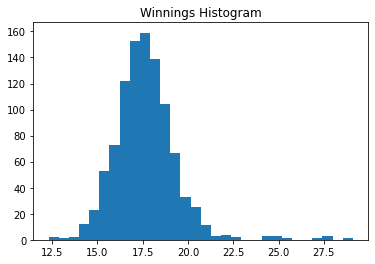

In [70]:
from matplotlib import pyplot as plt 
plt.hist(np.array(randomWins), bins=30)
plt.title("Winnings Histogram") 
plt.show()

## With Pooled Prizes (But you're the only winner)

In [71]:
randomWins = []
t1 = time.time()
for i in range(0, 10000):
    randomWins.append(multiple_weekly_drawings_pool(52, 200))
print(time.time() - t1)

5359.6984713077545


In [72]:
print("Average: $" + str(round(np.mean(np.array(randomWins)), 2)))
print("Stdev: $" + str(round(np.std(np.array(randomWins)), 2)))

Average: $17.94
Stdev: $18.12


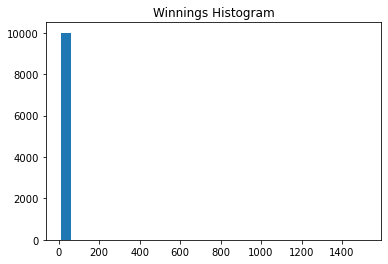

In [73]:
from matplotlib import pyplot as plt 
plt.hist(np.array(randomWins), bins=30)
plt.title("Winnings Histogram") 
plt.show()

In [74]:
np.sum(np.array(randomWins))

179447.85

In [77]:
np.where(np.array(randomWins) > 500)

(array([4349, 9330]),)

In [79]:
print(randomWins[4349])
print(randomWins[9330])

1517.0
1018.75


In [81]:
print((178447.85 - (1517+1018.75)) / 9998)
print(1018.75 / 5000)

17.594728945789157
0.20375


## 1000 Tickets No Pool

In [82]:
randomWins = []
t1 = time.time()
for i in range(0, 100):
    randomWins.append(multiple_weekly_drawings_nopool(52, 1000))
print(time.time() - t1)

268.06562995910645


In [42]:
print("Average: " + str(np.mean(np.array(randomWins))))
print("Stdev: " + str(np.std(np.array(randomWins))))

Average: 89.86695
Stdev: 4.008842750408153


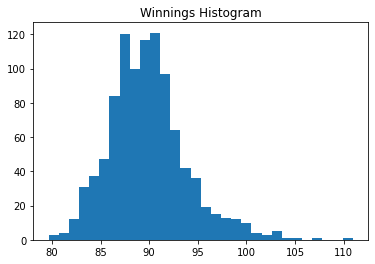

In [43]:
from matplotlib import pyplot as plt 
plt.hist(np.array(randomWins), bins=30)
plt.title("Winnings Histogram") 
plt.show()

## Across Different Ticket Levels

In [ ]:
t1 = time.time()

winsAcrossTickets = []

for i in range(100, 10001, 1000):
    randomWins = []
    for j in range(0, 100):
        randomWins.append(multiple_weekly_drawings_nopool(52, i))
    winsAcrossTickets.append(np.mean(np.array(randomWins)))
    
print(time.time() - t1)

In [ ]:
print(np.array(winsAcrossTickets))
print(25*np.array(range(100, 10001, 1000)))

In [ ]:
np.array(winsAcrossTickets) / 25*np.array(range(100, 10001, 1000))

## Multicore Processing - Not working

In [17]:
t1 = time.time()

processes = []
manager = multiprocessing.Manager()
return_dict = manager.dict()

for index in range(10):
    p = multiprocessing.Process(target=mc_multiple_weekly_drawings, args=(52, 200, index, return_dict))
    processes.append(p)
    p.start()
    
for process in processes:
    process.join()
    
print(time.time() - t1)
print(return_dict.values())

0 represent!3 represent!2 represent!


4 represent!
6 represent!
5 represent!
1 represent!
9 represent!
7 represent!
8 represent!
0.7144339084625244
